# RNN Tutorial 1
Thomas Delissen - November 2024

Goal of this Tutorial is to get an understanding how RNNs work, how to do a simple time series forecast with them, and analyse how they compare to "regular" NNs. 

## Part 1: Manual RNN Forward pass / Inference

We will start with manually computing a forward pass through a simple "pretrained" RNN, just to show how it works "under the hood". This will demonstrate how RNNs work in general, and give you the understanding that it is not that hard to implement as you might think. 

We will first create a simple Recurrent Neural Net with 1 Recurrent Layer with 1 Recurrent Cell in it, using 1 input feature. The input sequence will be 3 timesteps, we will only output to Y (binary classification) in the final timestep (so we ignore Y for the other timesteps). Here you can see the "rolled out" version for this RNN Example in a diagram. 

Do not worry too much what the output could represent, the main goal of this part of the tutorial is to understand the mathematics involved here. 

![Rolled Out RNN](RNNtutorial1.png)

We will provide you with the variables, and demonstrate how the calculation of the first value h(1) works. Fill in the blanks, to complete the calculation for the entire forward Pass of this RNN. I have defined my own sigmoid activation function for convenience.

In [1]:
import numpy as np

# sigmoid function:
def sigmoid(x):
    y = 1.0 / (1.0 + np.exp(-x))
    return y


In [2]:
# Input Parameters and Weights and Biases of this network:
# Since the input is a single feature, and there is only 1 RNN Cell in the layer, everything is a scalar.
h0 = 0
x0 = 0.7
x1 = 2.4
x2 = 3.9
U = 1.2
V = 0.65
Bh = -2
W = 1.1
By = 0.6


In [3]:
# Calculate h2, h3 and the final output Y
h1 = np.tanh(x0*U+h0*V+Bh)
print("h1: ", h1)
h2 = np.tanh(x1*U+h1*V+Bh)
print("h2: ", h2)
h3 = np.tanh(x2*U+h2*V+Bh)
print("h3: ", h3)
Y = sigmoid(h3*W+By)
print("Y: ", Y)

h1:  -0.8210398813328772
h2:  0.3331115254265242
h3:  0.9939211627891726
Y:  0.8446593915199757


If your Y is close to one (0.845), you did it right. You can play around with different values for x0, x1 and x2 to see how the network responds.

In [4]:
# Example different input values. Run the cell above to see how Y changes.
x0 = 0.7
x1 = 1.4
x2 = -2.6

Now, we will add a little complexity, by introducing a second input feature and a second RNN Cell in our RNN layer. That means our weights and biases are now vectors. We will model these as Numpy Arrays.

In [5]:
h0 = np.array([0, 0]) # initialized at zeroes
x0 = np.array([0.7, 1.3])
x1 = np.array([1.4, -0.9])
x2 = np.array([2.6, 0.5])
U = np.array([[1.2, -0.5],
              [0.3, 0.8]])   # 2x2 matrix for input-to-hidden weights

V = np.array([[0.65, -0.4],
              [0.5, 1.2]])   # 2x2 matrix for hidden-to-hidden weights

Bh = np.array([-2, 0.5])     # Bias for the hidden layer (2 units)

W = np.array([1.1, -0.9])    # 1x2 vector for hidden-to-output weights
By = np.array([0.6])         # Output bias - this is still a single number, but for consistency, I modeled it as an array


Fill in the blanks. Since we are now doing matrix multiplications, we use the "dot" function from numpy to do the multiplication. 

In [6]:
# Forward pass
# Step 1
h1 = np.tanh(np.dot(x0, U) + np.dot(h0, V) + Bh)
print("h1:", h1)

# Step 2
h2 = np.tanh(np.dot(x1, U) + np.dot(h1, V) + Bh)
print("h2:", h2)

# Step 3
h3 = np.tanh(np.dot(x2, U) + np.dot(h2, V) + Bh)
print("h3:", h3)

# Final output
Y = sigmoid(np.dot(h3, W) + By)
print("Y:", Y)

h1: [-0.64692945  0.83057887]
h2: [-0.53363571  0.32342401]
h3: [0.7949903  0.19887706]
Y: [0.78507666]


Great work! We could now wrap this in a function, that can handle sequences of different lenght. We will hardcode the weights and biases in this example, to pretend it is like a finalized trained RNN. 

The input of this function will be a Matrix of size n*2, where n represents the lenght of the sequence, and the 2 stands for the two features that are provided in each timestep of the sequence. 

In [7]:
def forwardpass(x_matrix):
    # x_matrix is a n*2 matrix
    # First hardcode the weights and Biases: 
    U = np.array([[1.2, -0.5],
              [0.3, 0.8]])   
    V = np.array([[0.65, -0.4],
              [0.5, 1.2]])   
    Bh = np.array([-2, 0.5])   
    W = np.array([1.1, -0.9])  
    By = np.array([0.6])
    # Initialize the hidden state as zeroes
    Ht = np.array([0,0])

    # Process each timestep in the sequence x_matrix
    for xt in x_matrix:
        Ht = np.tanh(np.dot(xt, U) + np.dot(Ht, V) + Bh)
    
    # Now we have the hidden state at the final timestep, and we can run it through the output node. 
    Y = sigmoid(np.dot(Ht, W) + By)
    return Y


Demonstrate it works by running the function with two sequences of varying lenght: 

In [8]:
# Sequence of lenght 3
x3_matrix = np.array([
    [0.7, 1.3],
    [1.4, -0.9],
    [2.6, 0.5]
])

# Sequence of lenght 5
x5_matrix = np.array([
    [0.7, 1.3],
    [1.4, -0.9],
    [2.6, 0.5],
    [-0.9, 1.5],
    [-2.0, 0.6]
])

y3 = forwardpass(x3_matrix)
y5 = forwardpass(x5_matrix)

print("Output of sequence lenght 3: " + str(y3))
print("Output of sequence lenght 5: " + str(y5))

Output of sequence lenght 3: [0.78507666]
Output of sequence lenght 5: [0.19811881]


Congratulations, you just implemented your own RNN function! Now you just need to make the weights an biases trainable ;) But for that, we will use Tensorflow. 

Before we move onto tensorflow, we want to highlight one important optimization we can do here. The function to calculate $Ht$ in the example before contains 2 dot products. 

If we concatenate the vectors $xt$ with $Ht$, as well as vertically stack the Vectors $U$ and $V$, we can reduce this to one big matrix multiplication. This is faster. You won't notice it in this small example, but in larger networks this is significant - it is therefore a standard practice in libraries such as Tensorflow and Pytorch, but you won't notice it, since it happens under the hood. 

Below it is demonstrated how to concatenate and stack the two vectors. 

In [9]:
U = np.array([[1.2, -0.5],
              [0.3, 0.8]])   
V = np.array([[0.65, -0.4],
              [0.5, 1.2]])   
Bh = np.array([-2, 0.5]) 

xt = [0.7, 1.3]
Ht = np.array([0,0])

# Default calculation (you can copy this from before):
Ht_default = np.tanh(np.dot(xt, U) + np.dot(Ht, V) + Bh)
print("Regular calculation: " + str(Ht_default))

# Concatenate xt and Ht:
xht = np.concatenate((xt,Ht))
# Vertical Stack U and V:
UV = np.vstack((U,V))

# Optimized calculation: 
Ht_opt = np.tanh(np.dot(xht, UV) + Bh)
print("Optimized calculation (should be the same): " + str(Ht_opt))

Regular calculation: [-0.64692945  0.83057887]
Optimized calculation (should be the same): [-0.64692945  0.83057887]


Create a new function forwardpass_optimized with the optimized matrix multiplication. 

In [10]:
def forwardpass_optimized(x_matrix):
    # x_matrix is a n*2 matrix
    # First hardcode the weights and Biases: 
    U = np.array([[1.2, -0.5],
              [0.3, 0.8]])   
    V = np.array([[0.65, -0.4],
              [0.5, 1.2]])   
    Bh = np.array([-2, 0.5])   
    W = np.array([1.1, -0.9])  
    By = np.array([0.6])
    # Initialize the hidden state as zeroes
    Ht = np.array([0,0])
    # Vertical Stack U and V:
    UV = np.vstack((U,V))

    # Process each timestep in the sequence x_matrix
    for xt in x_matrix:
        # Concatenate xt and Ht:
        xht = np.concatenate((xt,Ht))
        Ht = np.tanh(np.dot(xht, UV) + Bh)
    
    # Now we have the hidden state at the final timestep, and we can run it through the output node. 
    Y = sigmoid(np.dot(Ht, W) + By)
    return Y

Test your function by running below code. 

In [11]:
y3 = forwardpass_optimized(x3_matrix)
y5 = forwardpass_optimized(x5_matrix)

print("Output of sequence lenght 3: " + str(y3))
print("Output of sequence lenght 5: " + str(y5))

Output of sequence lenght 3: [0.78507666]
Output of sequence lenght 5: [0.19811881]


## Part 2: Time series example, preparing the data
In this section, we will prepare a time series dataset so that we can use it for both regular neural nets and RNNs. The dataset we will use hase been downloaded from an open data website from the City of Chicago: 

https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97/about_data

The exercise is based on the examples from the book "Hands-On Machine Learning with Scikit-Learn & Tensorflow" from Aurelien Geron. 

In [35]:
import pandas as pd

In [115]:
file_path = "CTA_-_Ridership_-_Daily_Boarding_Totals_20241104.csv"
df = pd.read_csv(file_path)
df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


As you can see, the file contains time series data with a granularity of "day", meaning that each record represents a day. It contains the sum of passengers that have boarded either a bus or a train, including the total amount of passengers. Let us analyse it a bit more. 

In [116]:
day_type_values = df['day_type'].unique()
print("Class values in 'day_type':", day_type_values)

Class values in 'day_type': ['U' 'W' 'A']


In [117]:
df.tail()

,service_date,day_type,bus,rail_boardings,total_rides
8701,08/27/2024,W,583649,409119,992768
8702,08/28/2024,W,637588,442189,1079777
8703,08/29/2024,W,644581,469123,1113704
8704,08/30/2024,W,606824,417283,1024107
8705,08/31/2024,A,428266,353476,781742


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   service_date    8706 non-null   object
 1   day_type        8706 non-null   object
 2   bus             8706 non-null   int64 
 3   rail_boardings  8706 non-null   int64 
 4   total_rides     8706 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 340.2+ KB


Ok, so now I know that the dataset runs from 01-01-2001 until 08-31-2024, it is formatted US Style (MM/DD/YYYY), and it is not stored as a datetype. I looked on the website for the values of day_type, and found out that: W = Weekday, A = Saturday, U = Sunday/Holiday.

There will definitely be seasonality in this dataset, and also there will most likely be a trend disruption in the year 2020 (Covid), but we will worry too much about that now. Our main goal for this notebook is to demonstrate how an RNN can be used to forecast passenger numbers on such a dataset, and compare it with regular NNs.

First, we will drop the columns day_type, bus and rail_boardings, we will focus just on the total rides per day. I will also convert the column service_date to a datetime type, this might be useful later on. 

In [119]:
# Convert service date to a datetime datatype. 
df['service_date'] = pd.to_datetime(df['service_date'], format='%m/%d/%Y')
# drop the columns we do not need
df = df.drop(["day_type", "bus", "rail_boardings"], axis=1)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   service_date  8706 non-null   datetime64[ns]
 1   total_rides   8706 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 136.2 KB


,service_date,total_rides
0,2001-01-01,423647
1,2001-01-02,1282779
2,2001-01-03,1361355
3,2001-01-04,1420032
4,2001-01-05,1448343


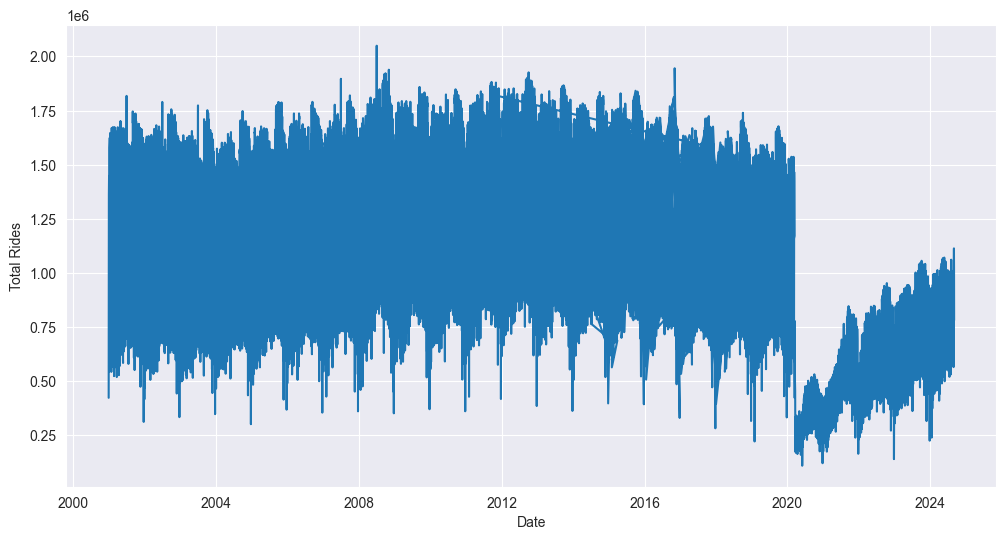

In [120]:
import matplotlib.pyplot as plt

# Plot total rides over the entire timeline
plt.figure(figsize=(12, 6))
plt.plot(df['service_date'], df['total_rides'], label='Total Rides')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.show()

We definitely see a trend disruption from 2020 onwards, so perhaps we should throw away everything after 2019, to simplify our tutorial. It also seems like some of the dates are not "in order", so we can fix that as well by ordering the dataframe again. 

In [121]:
# Filter data to include only dates before 01-01-2020
cutoff_date = '2019-12-31'
df = df[(df['service_date'] <= cutoff_date)]

# Sorting on date, just to make sure there are no artifacts during visualisation
df = df.sort_values(by='service_date').reset_index(drop=True)

# Verify the date range after filtering
print("Date range after filtering:", df['service_date'].min(), "to", df['service_date'].max())


Date range after filtering: 2001-01-01 00:00:00 to 2019-12-31 00:00:00


In [122]:
df.head()

,service_date,total_rides
0,2001-01-01,423647
1,2001-01-02,1282779
2,2001-01-03,1361355
3,2001-01-04,1420032
4,2001-01-05,1448343


Note that the service date is now formatted "normally", YYYY-MM-DD. 

We can now "split" the dataset in years. I want to visualize the years next to eachother, where the X-Axis represents the day of the year. In order to do this, I add two columns for year and day of year, and use those in the visualisation. 

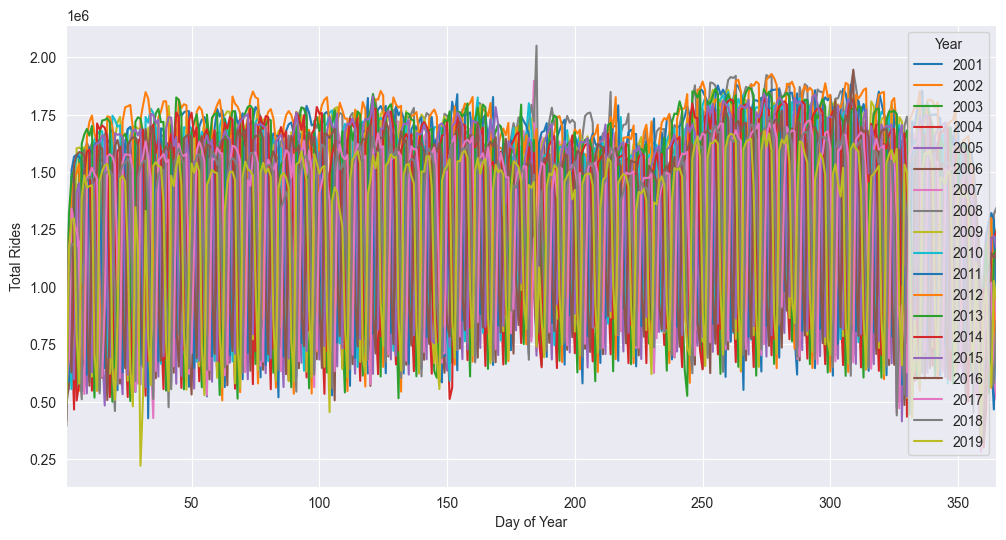

In [123]:
df['year'] = df['service_date'].dt.year
df['day_of_year'] = df['service_date'].dt.dayofyear

# Now plot again with the sorted data
plt.figure(figsize=(12, 6))

for year in df['year'].unique():
    yearly_data = df[df['year'] == year]
    plt.plot(yearly_data['day_of_year'], yearly_data['total_rides'], label=str(year))

# Label the plot
plt.xlabel('Day of Year')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
plt.xlim(1, 365) 
plt.show()


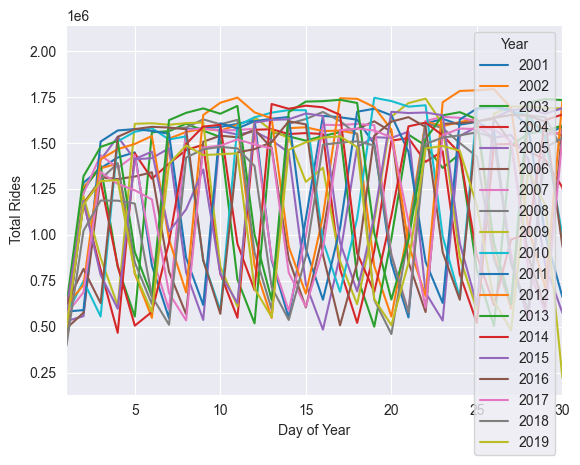

In [124]:
# Zoom in a bit on the first two month
# Label the plot
for year in df['year'].unique():
    yearly_data = df[df['year'] == year]
    plt.plot(yearly_data['day_of_year'], yearly_data['total_rides'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
plt.xlim(1, 30)  # Set x-axis limit to first month
plt.show()

We can notice a weekly trend, but since the weeks do not start all at the same day of each year, they are non-overlapping. In time series analytics, we would analyse this further, for now, we leave it as this. 

### Decide upon the forecast horizon and train/test split
We now need to decide what we want to forecast. We will define two use cases: 
- Single Prediction: Based on the data from the last 7 days, we predict the value for the next day. 
- Series Prediction: Based on the data from the last 14 days, we predict the value for the next 7 days. 

Note that in these examples, we are using fixed window sizes, which makes it possible to also do this with regular neural nets. We will have to create two dataframes, one for each problem definition.

Train test split: 
- We will use everything up and including 2015 as our training data, and everything from 2016 until end of 2019 as our test data. 

First split the dataframe into training and test data, based on the approach described above: 

In [125]:
# Split the data into training and test sets based on the specified dates: smaller or equal to 2015-12-31 and bigger than this date. 
train_data = df[(df["service_date"] <= "2015-12-31")]
test_data = df[(df["service_date"] > "2015-12-31")]

RNNs (and their more complicated variants) are sensitive to scale during their training process, so it is recommended to scale variables before use. The scaling (either z-scaling or min max scaling) needs to be done based on the values from the training set, and then applied on the test set. The reason we do not scale on the entire data (before splitting) is because might otherwise introduce data leakage, resulting in overly optimistic evaluation scores. 

Since we just split our data into a train and test set, this is a good time to scale the values in the column "total_rides". We will use z-normalisation, which in scikit learn is the standardscaler. 

Apply the scaler first to the train data using the function fit_and_transform. Then apply the same scaler to the test data using the function transform. 

Fill in the blanks. 

In [126]:
from sklearn.preprocessing import StandardScaler

# Normalize the training and test data
scaler = StandardScaler()
train_data['total_rides'] = scaler.fit_transform(train_data[["total_rides"]])
test_data['total_rides'] = scaler.transform(test_data[['total_rides']])

C:\Users\a3445\AppData\Local\Temp\ipykernel_16696\2888743034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_rides'] = scaler.fit_transform(train_data[["total_rides"]])
C:\Users\a3445\AppData\Local\Temp\ipykernel_16696\2888743034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['total_rides'] = scaler.transform(test_data[['total_rides']])


Now we will manually create a table for the sliding window approach for the Single Prediction use case. We will put the features and the labels in a separate list of lists. Both for the training and the test data. 

General approach, start with training data: 
- Initialise empty lists for our X_train (features) and y_train (label). 
- Loop through all the rows in the original training data starting at index 7 (think about why this is needed)
- Take the passenger numbers from 7 rows before the current row, and put them into a list. Append this list to our X_train list of lists
- Take the passenger number from the current row, and append that to our y_train list
- Do the same for the test data X_test, y_test

It is recommended to use the $iloc[from:to].values$ function for X, and the $iloc[index]$ for the Y.

In [127]:
# TRAINING DATA
X_train = []
y_train = []

for i in range(7, len(train_data)):
    X_train.append(train_data["total_rides"].iloc[i-7:i].values)
    y_train.append(train_data["total_rides"].iloc[i])

print(len(X_train))
print(len(y_train))
print(X_train[0])
print(y_train[0])

5533
5533
[-2.44933265 -0.26674009 -0.06712072  0.08194599  0.15386903 -1.41000407
 -2.13937337]
0.4779913821845092


Do the same for the test data: 

In [141]:
# TEST DATA
X_test = []
y_test = []


for i in range(7, len(test_data)):
    X_test.append(test_data["total_rides"].iloc[i-7:i].values)
    y_test.append(test_data["total_rides"].iloc[i])

print(len(X_test))
print(len(y_test))
print(X_test[0])
print(y_test[0])

1454
1454
[-1.94248753 -1.45672063 -1.9296709   0.36795633  0.47437884  0.5063023
  0.49617093]
0.4730679660281492


Good job, that is our training and test data for the Single Prediction use case. For convenience, we will convert them to Numpy Arrays, because those are easier to work with in Tensorflow. Execute the following code as is, so that we can use the proper variables later on.

In [142]:
X_train_SinglePred = np.array(X_train)
y_train_SinglePred = np.array(y_train)
X_test_SinglePred = np.array(X_test)
y_test_SinglePred = np.array(y_test)

Now, we will do the same preparation for the second use case: 

Series Prediction: Based on the data from the last 14 days, we predict the value for the next 7 days. 

You can use the same code as before, with slight adaptations in the numbers and the shape of the y_train and y_test lists.

Hints: 
- y will now also be a list of lists
- maybe you should not loop completely to the end this time. 

Fill in the blanks: 

In [130]:
# TRAINING DATA
X_train_m = []
y_train_m = []

for i in range(14, len(train_data)-7):
    X_train_m.append(train_data["total_rides"].iloc[i-14:i].values)
    y_train_m.append(train_data["total_rides"].iloc[i:i+7].values)

print(len(X_train_m))
print(len(y_train_m))
print(X_train_m[0])
print(y_train_m[0])

5519
5519
[-2.44933265 -0.26674009 -0.06712072  0.08194599  0.15386903 -1.41000407
 -2.13937337  0.47799138  0.48397417  0.50595933  0.54693191  0.60072112
 -1.33610202 -2.13358874]
[-0.76158406  0.65735565  0.6383098   0.604763    0.26938893 -1.37594663
 -2.12709785]


In [131]:
# TEST DATA
X_test_m = []
y_test_m = []

for i in range(14, len(test_data)-7):
    X_test_m.append(test_data["total_rides"].iloc[i-14:i].values)
    y_test_m.append(test_data["total_rides"].iloc[i:i+7].values)

print(len(X_test_m))
print(len(y_test_m))
print(X_test_m[0])
print(y_test_m[0])

1440
1440
[-1.94248753 -1.45672063 -1.9296709   0.36795633  0.47437884  0.5063023
  0.49617093  0.47306797 -1.33790829 -2.07760711  0.15233713  0.19832712
  0.29496631  0.58288199]
[ 0.5408094  -1.26201705 -2.23581948 -1.37818224  0.38190347  0.57835997
  0.63934123]


In [132]:
X_train_MultiPred = np.array(X_train_m)
y_train_MultiPred = np.array(y_train_m)
X_test_MultiPred = np.array(X_test_m)
y_test_MultiPred = np.array(y_test_m)

## Part 3: Classic Deep Learning
We now have our training data and test data prepared for our two use cases: 
- Single Prediction: Based on the data from the last 7 days, we predict the value for the next day. 
- Series Prediction: Based on the data from the last 14 days, we predict the value for the next 7 days. 

Next, we will model two simple regular neural nets for these use cases in Keras, train them, and evaluate them on the test set. This will be our baseline to compare this with the RNN approach. 

In [133]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

We will start with the Single Prediction use case. Define a Neural net takes takes as input shape: X_train_SinglePred.shape[1], and has two deep layers, one with 20 neurons and one with 10 neurons. Relu Activation functions, the output layer does not use an activation function, since we output a number. Compile it using the adam optimizer and mean square error as the loss. 

In [145]:
model_single = Sequential()

model_single.add(Dense(20, activation='relu', input_shape=(X_train_SinglePred.shape[1],)))
model_single.add(Dense(10, activation='relu'))
model_single.add(Dense(1))

# Compile the model
model_single.compile(optimizer='adam', loss='mse')

D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now train the model on the training data, for 20 epochs, with a batch size of 32 (or smaller if needed) and a validation split of 0.2. 

In [146]:
model_single.fit(X_train_SinglePred, y=y_train_SinglePred, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0073 - val_loss: 0.2737
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2172 - val_loss: 0.2359
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1846 - val_loss: 0.2195
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1903 - val_loss: 0.2073
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1798 - val_loss: 0.1987
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1750 - val_loss: 0.1937
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1820 - val_loss: 0.1885
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1937 - val_loss: 0.1849
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1792 - val_loss: 0.1823
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1666 - val_loss: 0.1817
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1677 - val_loss: 0.1798
Epoch 12/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Now inference the model on the test data X_test_SinglePred, by using the predict function. We will evaluate the performance using the Root mean squared error function from sci-kit learn

In [147]:
from sklearn.metrics import root_mean_squared_error

# Inference on the test set
y_test_prediction = model_single.predict(X_test_SinglePred)

# Calculate the rmse_single
rmse_single = root_mean_squared_error(y_test_SinglePred, y_test_prediction)
print(rmse_single)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.365761006734541


Now, let us do the same for the Series Prediction, where we want to predict the next 7 values, based on the last 14. Fill in the blanks:

In [148]:
model_series = Sequential()

model_series.add(Input(shape=(X_train_MultiPred.shape[1],)))
model_series.add(Dense(20, activation='relu')) 
model_series.add(Dense(10, activation='relu'))  
model_series.add(Dense(7))

model_series.compile(optimizer='adam', loss='mse')

Again, train the model on the training data, for 20 epochs, with a batch size of 32 (or smaller if needed) and a validation split of 0.2.

In [149]:
model_series.fit(X_train_MultiPred, y=y_train_MultiPred, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1081 - val_loss: 0.6086
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5165 - val_loss: 0.3820
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3229 - val_loss: 0.3132
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2822 - val_loss: 0.2904
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2624 - val_loss: 0.2781
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2341 - val_loss: 0.2668
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2307 - val_loss: 0.2577
Epoch 8/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2322 - val_loss: 0.2514
Epoch 9/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2189 - val_loss: 0.2472
Epoch 10/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2241 - val_loss: 0.2429
Epoch 11/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2105 - val_loss: 0.2395
Epoch 12/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Now inference the model on the test data X_test_MultiPred, by using the predict function. Again, evaluate the performance using the Root mean squared error function from sci-kit learn

In [150]:
# Inference on the test set
y_test_prediction_series = model_series.predict(X_test_MultiPred)

# Calculate the rmse_single
rmse_series = root_mean_squared_error(y_test_MultiPred, y_test_prediction_series)
print(rmse_series)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.4293426742527186


Most likely, your series model is performing worse than the single prediction model, because it is a more difficult task. Let us see how the RNNs perform!

## Part 4: Training an RNN on this data
Finally, we will build and train an RNN in Keras & Tensorflow! 

The first RNN is a very simple one, that reads in a sequence, and outputs to a single numeric output node. So it is very similar to the model we created manually at the beginning of this notebook. 

RNNs in Keras expect input data in a 3D shape: (samples, time steps, features), which breaks down as follows:
- Samples: Each independent sequence in the data (rows in X_single).
- Time Steps: The length of the sequence being fed to the RNN. Here, it’s the 7-day input window.
- Features: The number of features per time step. Since we only have total_rides for each day, this value is 1.

So, X_train_SinglePred initially has the shape (num_samples, 7), and we reshape it to (num_samples, 7, 1) to satisfy the RNN's 3D input requirements.

The RNN Layer in Keras is called SimpleRNN, to differentiate it from more complex variants such as the GRU or the LSTM (which we will cover in the next lecture). It has a boolean parameter called "return_sequences" that determines whether the loss function only looks at the final prediction, or at the entire sequence. Per default it is set to False, which we need for our example. 

Fill in the blanks. We want 10 RNN cells, Relu activation function and an additional dense layer with 10 nodes before the output node. 

In [166]:
from tensorflow.keras.layers import SimpleRNN

# Reshape the X matrices to be compatible with RNN input (samples, time steps, features)
X_single_rnn = X_train_SinglePred.reshape((X_train_SinglePred.shape[0], X_train_SinglePred.shape[1], 1))
X_single_test_rnn = X_test_SinglePred.reshape((X_test_SinglePred.shape[0], X_test_SinglePred.shape[1], 1))

# Create the RNN model
model_single_rnn = Sequential()
model_single_rnn.add(Input(shape=(X_single_rnn.shape[1], X_single_rnn.shape[2])))
model_single_rnn.add(SimpleRNN(10, activation='relu'))
model_single_rnn.add(Dense(10, activation='relu'))
model_single_rnn.add(Dense(1))


# Compile the model
model_single_rnn.compile(optimizer='adam', loss='mse')

Train the model for 20 epochs, Batch size 32 and validation split of 0.2. Since all sequences are of similar lenght, it is no problem to use a batch size bigger than 1.

In [167]:
# Train the model
model_single_rnn.fit(X_single_rnn, y_train_SinglePred, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.8090 - val_loss: 0.3055
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2386 - val_loss: 0.2368
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2161 - val_loss: 0.2156
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1978 - val_loss: 0.2048
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1758 - val_loss: 0.2028
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1820 - val_loss: 0.1944
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1847 - val_loss: 0.1992
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1683 - val_loss: 0.1952
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1804 - val_loss: 0.1900
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1985 - val_loss: 0.1922
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1663 - val_loss: 0.1858
Epoch 12/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [168]:
# Predict and evaluate on test data
y_single_rnn_pred = model_single_rnn.predict(X_single_test_rnn)

# Calculate RMSE for single prediction RNN
rmse_single_rnn = root_mean_squared_error(y_test_SinglePred, y_single_rnn_pred)
print("Single Prediction RNN Model RMSE:", rmse_single_rnn)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Single Prediction RNN Model RMSE: 0.38689053640801796


Congratulations, you have trained your first RNN on a time series task. Did it perform better than the single normal feedforward neural net?

Next we will do the same for the Series forecast, where we want to predict the next 7 values, based on the last 14. This is a sequence to sequence task, and will be modeled by using the encoder - decoder architecture. We could also have used a simpler RNN, where we only process the input as a sequence, and predict the 7 values at the same timestep (using 7 output nodes), but here I want to show you how to set up the more complicated architecture in Keras as well. 

This cannot easily be done with the sequential API from Keras, so we will switch to the functional API. 

First we will define the encoder. We explicitly define the final output of the encoder as the encoder_state, which we will pass to the decoder. 

In [170]:
from tensorflow.keras.models import Model

# Define the input shape for the encoder (14 days of data, 1 feature)
encoder_inputs = Input(shape=(14, 1))

# Encoder RNN: Process the input sequence and output the final hidden state as the output. 20 RNN Cells, Relu, no return sequence
encoder_rnn = SimpleRNN(20, activation="relu", return_sequences=False)
encoder_output = encoder_rnn(encoder_inputs)


Now we can define the decoder. The decoder will produce an output at each timestep (return_sequences=True). The input values to the decoder will be 7 zeroes, to ensure that it exactly outputs for 7 timesteps. The actual information on what it needs to generate, it will get from the (initial) hidden state, which is the encoder_output. We will add a single regular neuron as the output layer.

In [174]:
decoder_inputs = Input(shape=(7, 1))  # Here we will input the 7 zeroes

# I will also already provide dummy values for the training data
decoder_input_train = tf.zeros((X_train_MultiPred.shape[0], 7, 1))

# RNN Layer of decoder. 20 RNN Cells, Relu, return sequences set to True 
decoder_rnn = SimpleRNN(20, activation="relu", return_sequences=True)
decoder_rnn_outputs = decoder_rnn(decoder_inputs, initial_state=encoder_output) # note that we add the output from the encoder here
# Final dense layer of decoder. 
decoder_dense = Dense(1) # this defines the output layer of the network
decoder_final_outputs = decoder_dense(decoder_rnn_outputs)

Now, the Model that we will compile and train is the combination of the encoder and decoder. To define it, we need to provide the inputs and outputs of the elements we just defined. 

Inputs: 
- Encoder inputs
- Decoder inputs (7 zeroes)

Outputs: 
- Decoder output (7 predictions)

Define the model, then compile it as before, with optimizer adam and loss function mse.

In [176]:
# Define the model with encoder and decoder
model_series_rnn = Model([encoder_inputs, decoder_inputs], decoder_final_outputs)

# Compile the model as before
model_series_rnn.compile(optimizer='adam', loss='mse')

Great job, you just created a fully functioning encoder - decoder architecture. Let us train it!

20 Epochs, Batch size 32, validation split 0.2.

In [177]:
model_series_rnn.fit([X_train_MultiPred, decoder_input_train], y_train_MultiPred, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_53', 'keras_tensor_58']. Received: the structure of inputs=('*', '*')
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9072 - val_loss: 0.3785
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3127 - val_loss: 0.3014
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2503 - val_loss: 0.2665
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2232 - val_loss: 0.2530
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2149 - val_loss: 0.2481
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2067 - val_loss: 0.2376
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2188 - val_loss: 0.2341
Epoch 8/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1936 - val_loss: 0.2303
Epoch 9/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1959 - val_loss: 0.2297
Epoch 10/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1768 - val_loss: 0.2351
Epoch 11/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1816 - val_loss: 0.2236
Epoch 12/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

Now let us evaluate it on our test data, using RMSE. 

In [178]:
# Generate dummy values for the test data: 
decoder_input_test = tf.zeros((X_test_MultiPred.shape[0], 7, 1))

# Predict and evaluate on test data
y_series_rnn_pred = model_series_rnn.predict([X_test_MultiPred, decoder_input_test])

# Remove the last dimension to get the desired shape
y_series_rnn_pred = np.squeeze(y_series_rnn_pred, axis=-1)

# Calculate RMSE for single prediction RNN
rmse_series_rnn = root_mean_squared_error(y_series_rnn_pred, y_test_MultiPred)
print("Series Prediction RNN Model RMSE:", rmse_series_rnn)

D:\Uni\5. Semester\Data Mining\venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_53', 'keras_tensor_58']. Received: the structure of inputs=('*', '*')
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Series Prediction RNN Model RMSE: 0.4118410447094875


Well done! Running below cell will give you a comparison of the performance between the different models. 

In [179]:
print("Single Prediction classic Model RMSE:", rmse_single)
print("Single Prediction RNN Model RMSE:", rmse_single_rnn)
print("Series Prediction classic Model RMSE:",rmse_series)
print("Series Prediction RNN Model RMSE:", rmse_series_rnn)

Single Prediction classic Model RMSE: 0.365761006734541
Single Prediction RNN Model RMSE: 0.38689053640801796
Series Prediction classic Model RMSE: 0.4293426742527186
Series Prediction RNN Model RMSE: 0.4118410447094875


You can also check the weights and biases of the models, to see how memory-intensive they are. The interesting numbers are the Trainable params, the Optimizer Params are not stored, they are part of the Adam optimizer. 

In [184]:
model_single.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,145 (4.48 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 764 (2.99 KB)

In [185]:
model_single_rnn.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725 (2.84 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 484 (1.89 KB)

In [182]:
model_series.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 587 (2.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,176 (4.60 KB)

In [183]:
model_series_rnn.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 14, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_18      │ (None, 7, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_5        │ (None, 20)        │        440 │ input_layer_16[0… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_7        │ (None, 7, 20)     │        440 │ input_layer_18[0… │
│ (SimpleRNN)         │                   │            │ simple_rnn_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 7, 1)      │         21 │ simple_rnn_7[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,705 (10.57 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,804 (7.05 KB)